<h2> Importing Modules

In [128]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------- ----------------- 61.4/108.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 108.4/108.4 kB 3.2 MB/s eta 0:00:00


In [129]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import folium 
from folium.plugins import HeatMap
import warnings 

<h2> Loading Datasets

In [65]:
data = pd.read_csv(r"C:\Users\khush\Documents\Project\Task 5\US_Accidents_March23.csv\US_Accidents_March23.csv")

<h2> Data Preview 

In [66]:
data.shape

(7728394, 46)

In [67]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [68]:
data.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [70]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [72]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<h2> Data Cleaning

In [74]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values != 0 ]  
missing_values = missing_values.sort_values(ascending = False) 
missing_values

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

<Axes: >

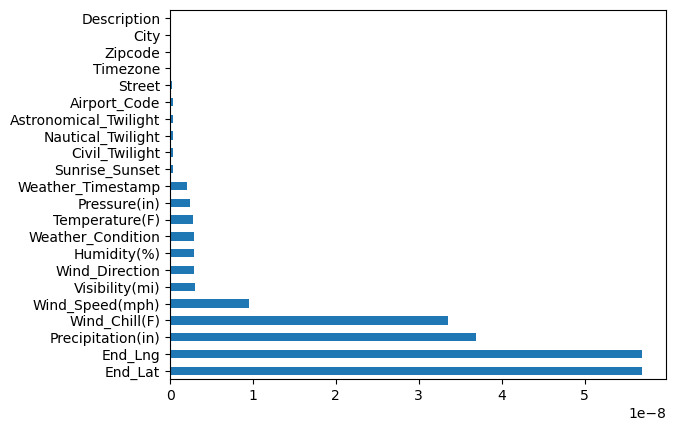

In [77]:
missing_values = missing_values / len(data) 
missing_values.plot(kind = 'barh') 

In [78]:
threshold = len(data) * 0.4
columns_to_drop = missing_values[missing_values > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)

In [79]:
print("Shape of data before cleaning:", data.shape)
print("Shape of data after cleaning:", data_cleaned.shape)

Shape of data before cleaning: (7728394, 46)
Shape of data after cleaning: (7728394, 46)


In [80]:
cleaned_file_path = 'cleaned_dataset.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print("Columns dropped:", columns_to_drop)
print("Cleaned dataset saved to", cleaned_file_path)

Columns dropped: Index([], dtype='object')
Cleaned dataset saved to cleaned_dataset.csv


<h2> EDA and Visualizations

<h3>City

In [82]:
accident_per_city = data.City.value_counts()
accident_per_city[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [84]:
cities = data.City.unique()
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

<Axes: ylabel='City'>

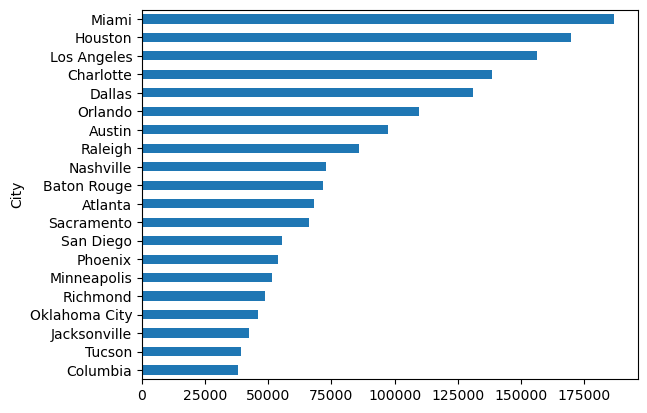

In [85]:
accident_per_city[:20].sort_values(ascending = True).plot(kind='barh') 

In [88]:
warnings.filterwarnings('ignore') 
sns.set_style('darkgrid') 

<Axes: xlabel='count', ylabel='Density'>

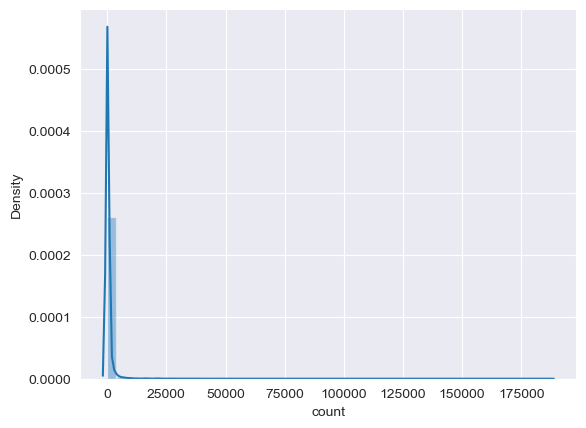

In [89]:
accident_per_city = data.City.value_counts() 
sns.distplot(accident_per_city)

In [90]:
high_accident_cities = accident_per_city[accident_per_city >= 1000]
low_accident_cities  = accident_per_city[accident_per_city < 1000 ] 

In [91]:
len(high_accident_cities)/ len(cities) * 100,   len(low_accident_cities) / len(cities) * 100 

(8.904159660793917, 91.0885298632941)

<Axes: xlabel='count', ylabel='Density'>

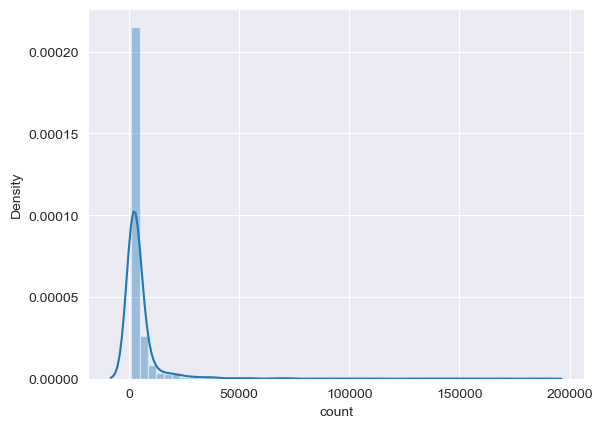

In [92]:
sns.distplot(high_accident_cities)


<h3>Start Time 

In [94]:
data.Start_Time = pd.to_datetime(data['Start_Time'] , format='mixed', errors='coerce' ) 

<Axes: xlabel='Start_Time'>

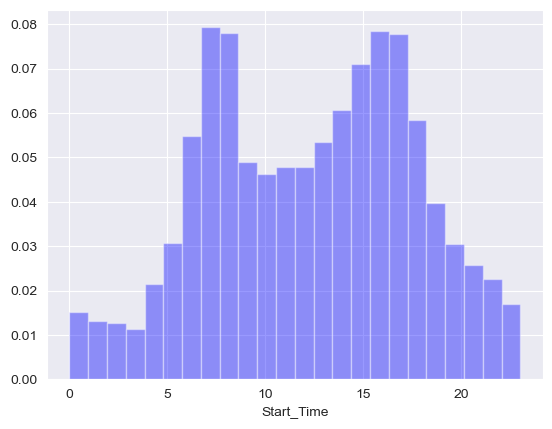

In [100]:
sns.distplot( data.Start_Time.dt.hour , bins = 24 , kde = False, norm_hist = True ,color = 'blue')

<Axes: xlabel='Start_Time'>

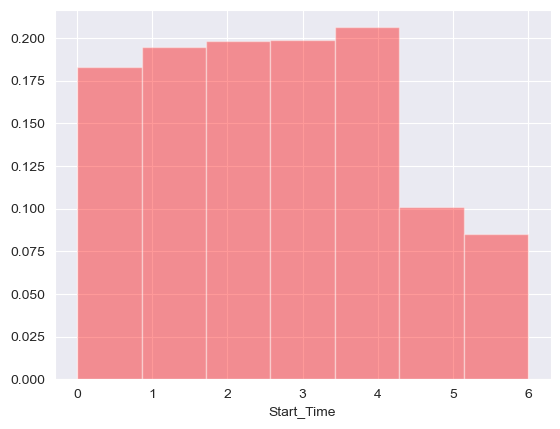

In [101]:
sns.distplot( data.Start_Time.dt.dayofweek , bins = 7 , kde = False , norm_hist = True , color = 'red')

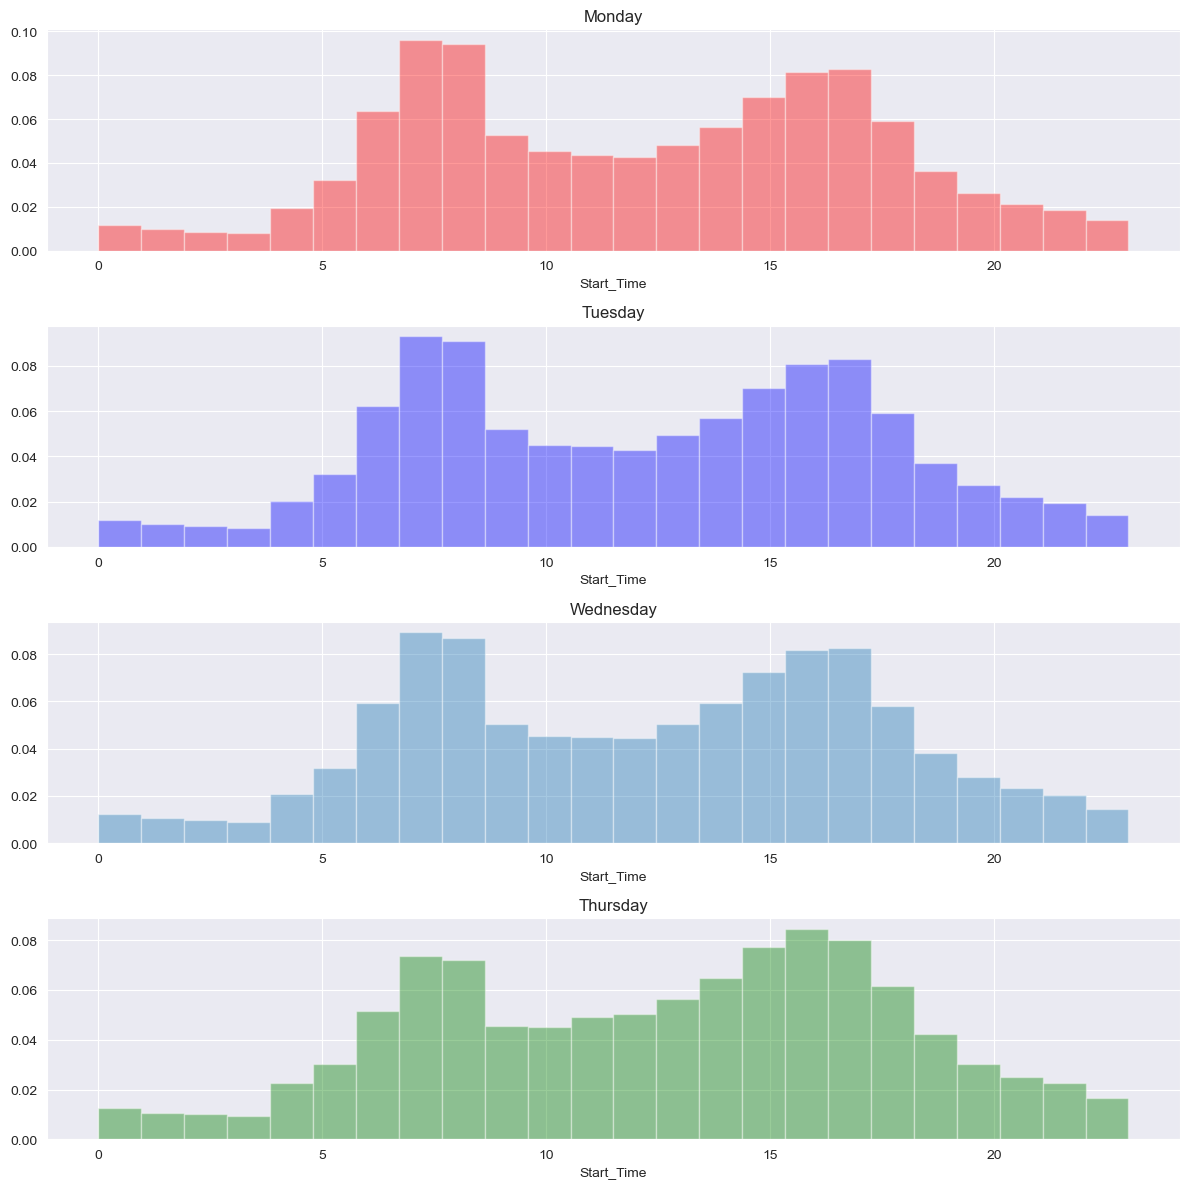

In [111]:
#Week Days
mon_day = data.Start_Time [ data.Start_Time.dt.dayofweek == 1 ] 
tues_day = data.Start_Time [ data.Start_Time.dt.dayofweek == 2 ] 
wednes_day = data.Start_Time [ data.Start_Time.dt.dayofweek == 3 ] 
thurs_day = data.Start_Time [ data.Start_Time.dt.dayofweek == 4 ] 

fig , axis = plt.subplots(4,1 , figsize = ( 12 , 12)) 
sns.distplot(mon_day.dt.hour , bins = 24 , kde = False ,norm_hist = True ,ax = axis[0] , color = 'red').set_title('Monday') 
sns.distplot(tues_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[1] , color = 'blue').set_title('Tuesday')
sns.distplot(wednes_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[2] ).set_title('Wednesday') 
sns.distplot(thurs_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[3] , color = 'green').set_title('Thursday')
fig.tight_layout()

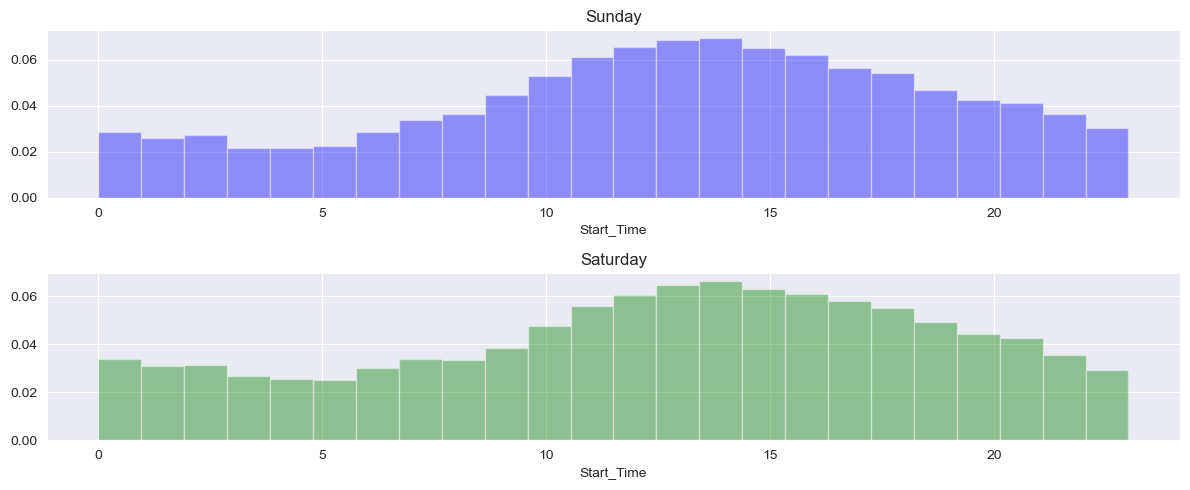

In [113]:
#Weekends
sun_day = data.Start_Time [ data.Start_Time.dt.dayofweek == 5 ] 
sat_day = data.Start_Time [ data.Start_Time.dt.dayofweek == 6 ]

fig , axis = plt.subplots(2,1 , figsize = (12 ,5))
sns.distplot(sun_day.dt.hour , bins = 24 , kde = False ,norm_hist = True ,ax = axis[0] , color = 'blue').set_title('Sunday') 
sns.distplot(sat_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[1] , color = 'green').set_title('Saturday') 
fig.tight_layout()

<Axes: xlabel='Start_Time'>

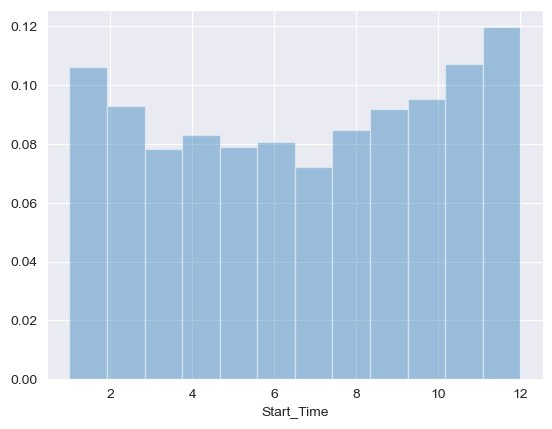

In [115]:
sns.distplot( data.Start_Time.dt.month , kde = False , bins = 12 , norm_hist = True)

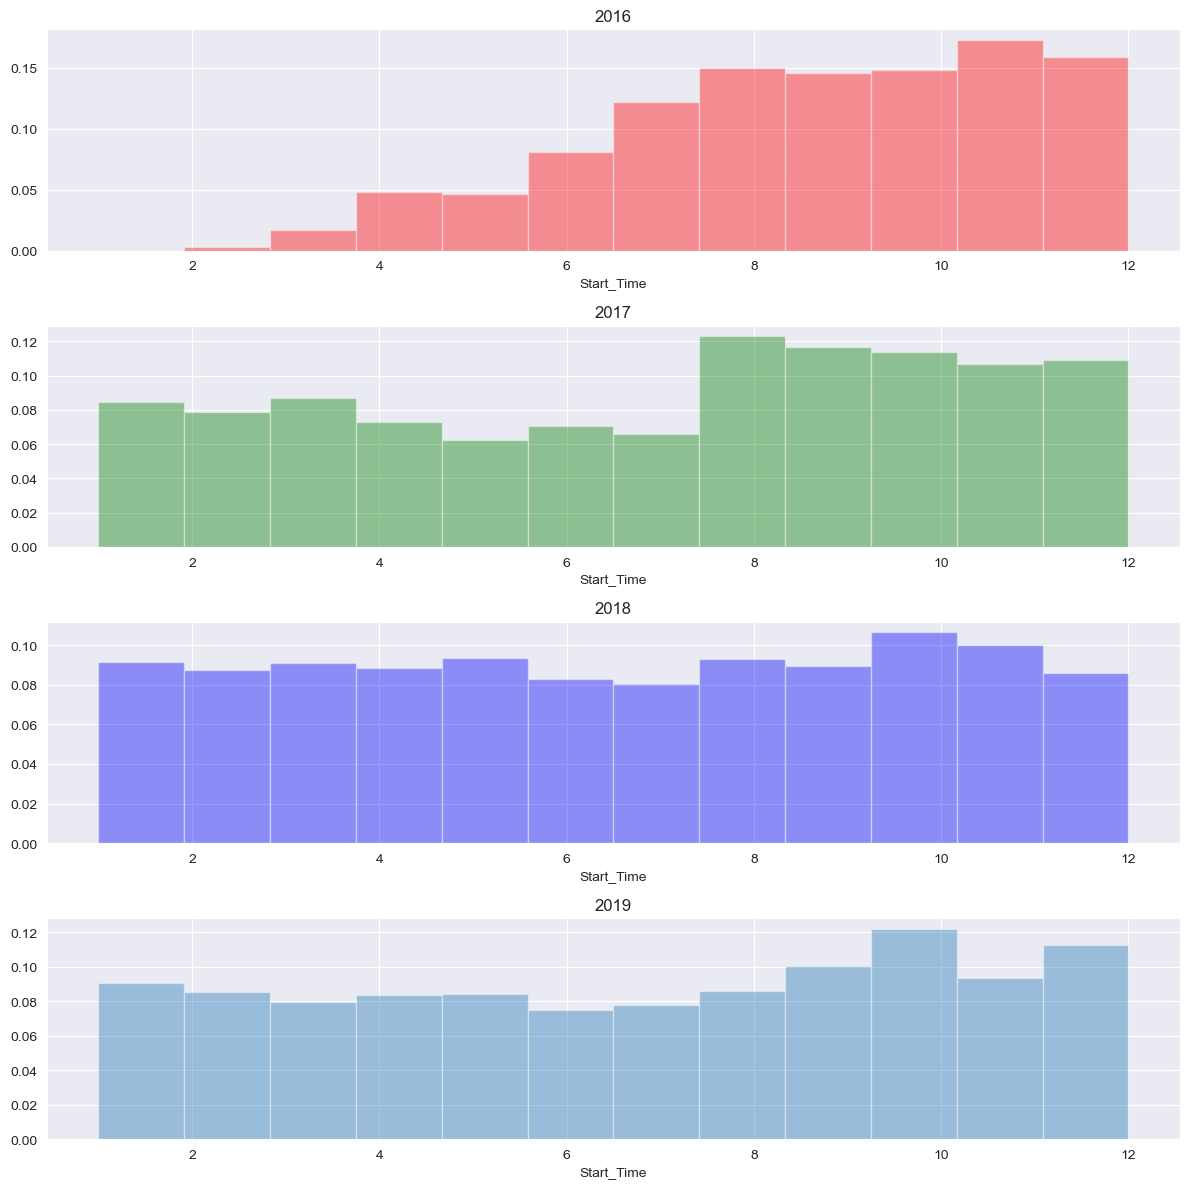

In [117]:
data_2016 = data.Start_Time [ data.Start_Time.dt.year == 2016 ] 
data_2017 = data.Start_Time [ data.Start_Time.dt.year == 2017 ] 
data_2018 = data.Start_Time [ data.Start_Time.dt.year == 2018 ] 
data_2019 = data.Start_Time [ data.Start_Time.dt.year == 2019 ] 

fig , axes = plt.subplots( 4, 1, figsize = (12,12) )
sns.distplot(data_2016.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[0] , color = 'red').set_title('2016')
sns.distplot(data_2017.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[1] , color = 'green' ).set_title('2017')
sns.distplot(data_2018.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[2] , color = 'blue' ).set_title('2018')
sns.distplot(data_2019.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[3] ).set_title('2019')
fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


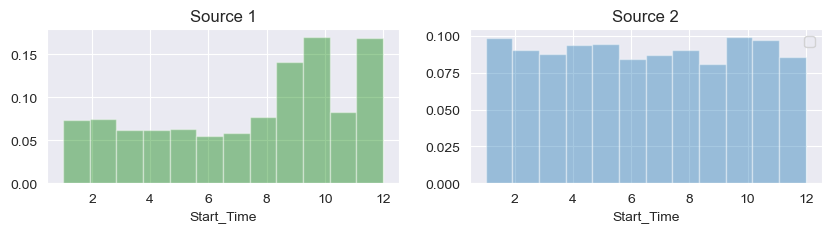

In [122]:
data_2019_data_src1 = data_2019[data.Source == 'Source1' ]
data_2019_data_src2 = data_2019[data.Source == 'Source2' ]

plt.figure(figsize=(10 , 2))
plt.subplot(1,2,1) 
sns.distplot( data_2019_data_src1.dt.month , bins = 12 , kde = False , norm_hist = True  , color = 'green')
plt.title('Source 1') 
plt.subplot(1,2,2) 
sns.distplot( data_2019_data_src2.dt.month , bins = 12 , kde = False , norm_hist = True) 
plt.title('Source 2') 
plt.legend() 
plt.show()

<Axes: ylabel='count'>

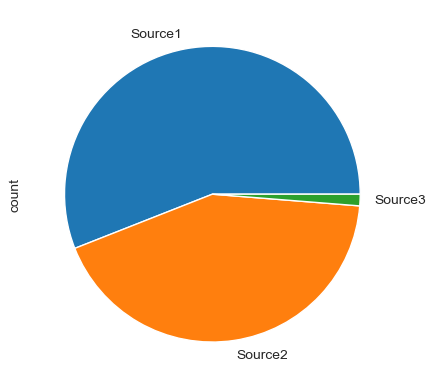

In [123]:
data.Source.value_counts().plot(kind = 'pie')  

<h3> Start Langitude and Start Latitude

In [124]:
data.Start_Lng ,data.Start_Lat

(0          -84.058723
 1          -82.831184
 2          -84.032608
 3          -84.205582
 4          -84.188354
               ...    
 7728389   -117.379360
 7728390   -117.148060
 7728391   -117.847790
 7728392   -118.403020
 7728393   -117.230920
 Name: Start_Lng, Length: 7728394, dtype: float64,
 0          39.865147
 1          39.928059
 2          39.063148
 3          39.747753
 4          39.627781
              ...    
 7728389    34.002480
 7728390    32.766960
 7728391    33.775450
 7728392    33.992460
 7728393    34.133930
 Name: Start_Lat, Length: 7728394, dtype: float64)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

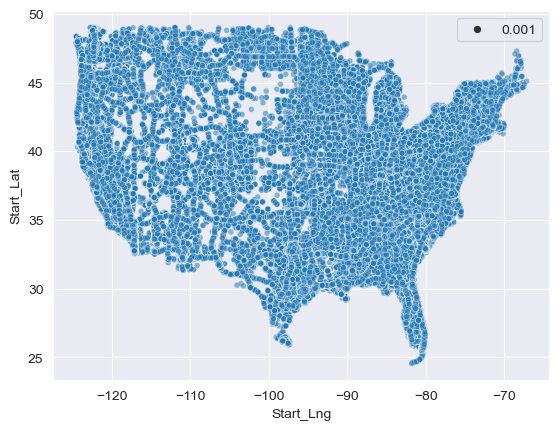

In [126]:
sns.scatterplot( x = data.Start_Lng , y = data.Start_Lat, size = 0.001  ,alpha = 0.5) 

In [130]:
lat_lng_pairs = zip( list(data.Start_Lat[:50]) , list(data.Start_Lng[:50]) ) 
map_ = folium.Map()  
HeatMap(lat_lng_pairs).add_to(map_) 
map_

<h3> Temperature

<Axes: xlabel='Temperature(F)'>

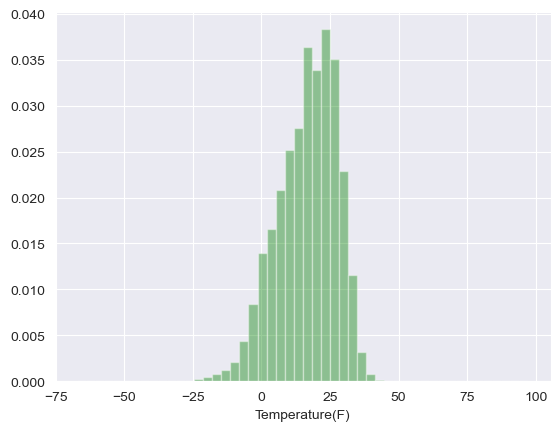

In [131]:
sns.distplot((data['Temperature(F)'] - 32 ) * (5/9) , kde = False , norm_hist = True , color = 'green')

In [132]:
colder = data[data['Temperature(F)'] <= 15]['Temperature(F)'] 
warmer = data[data['Temperature(F)'] >15]['Temperature(F)'] 

<Axes: xlabel='Temperature(F)', ylabel='Density'>

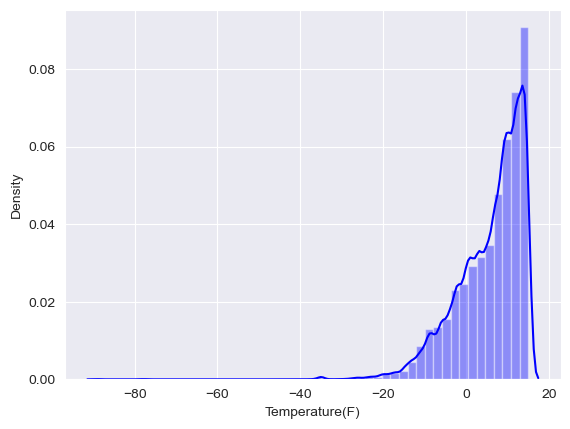

In [133]:
sns.distplot(colder , norm_hist = True  , color = 'blue') 

<Axes: xlabel='Temperature(F)', ylabel='Density'>

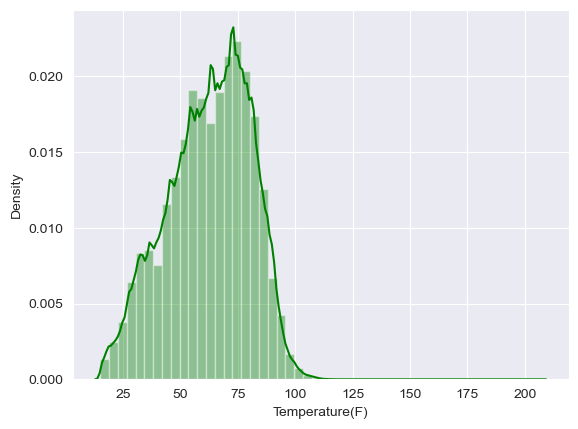

In [135]:
sns.distplot(warmer , norm_hist = True  , color = 'green') 

<Axes: ylabel='Weather_Condition'>

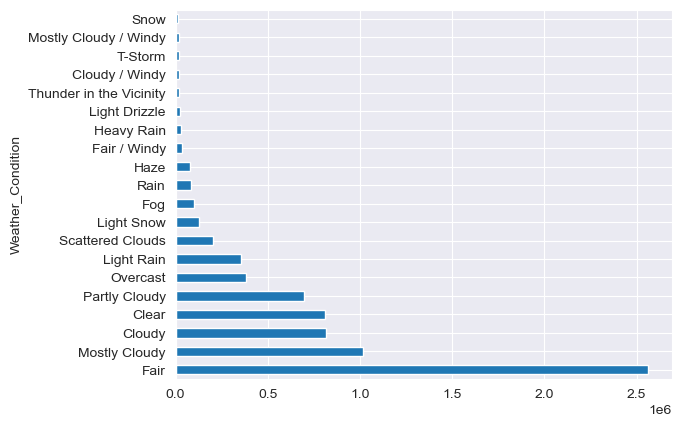

In [137]:
data.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh') 

In [139]:
total_weather_conditions = data.Weather_Condition.unique()
len(total_weather_conditions) , total_weather_conditions

(145,
 array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
        'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
        'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
        'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
        'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
        'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
        'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
        'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
        'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
        'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
        'Light Rain Shower', 'Light Rain with Thunder',
        'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
        'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
        'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
        'Light Thu

<Axes: xlabel='count', ylabel='Density'>

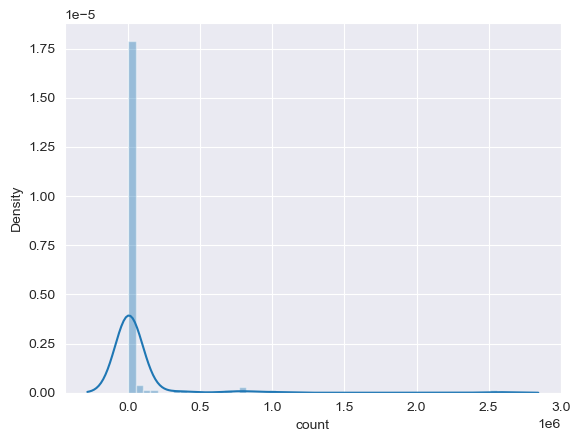

In [141]:
accidents_per_weather = data.Weather_Condition.value_counts() 
sns.distplot(accidents_per_weather) 

In [142]:
High_accident_weather = accidents_per_weather [accidents_per_weather >= 1000 ] 
low_accident_weather = accidents_per_weather [accidents_per_weather < 1000]   

len(High_accident_weather) / len(total_weather_conditions) * 100 , len(low_accident_weather) / len(total_weather_conditions) * 100


(32.41379310344827, 66.89655172413794)

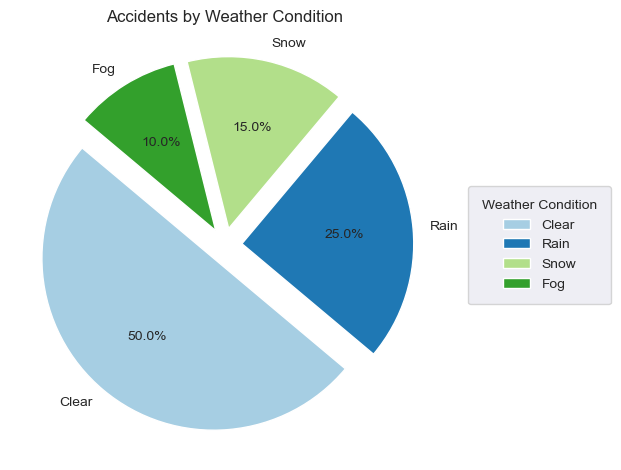

In [149]:
df = pd.DataFrame({'Weather_Condition': ['Clear', 'Rain', 'Snow', 'Fog'], 'Accidents': [100, 50, 30, 20]})

fig, ax = plt.subplots()  
wedges, texts, autotexts = ax.pie(
    df['Accidents'],
    labels=df['Weather_Condition'],
    autopct='%1.1f%%',
    explode=[0.1]*len(df),
    startangle=140,
    colors=plt.cm.Paired(range(len(df)))
)

ax.legend(
    wedges,
    df['Weather_Condition'],
    title="Weather Condition",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5), 
    borderpad=1
)

plt.title('Accidents by Weather Condition')
plt.tight_layout()  
plt.show()

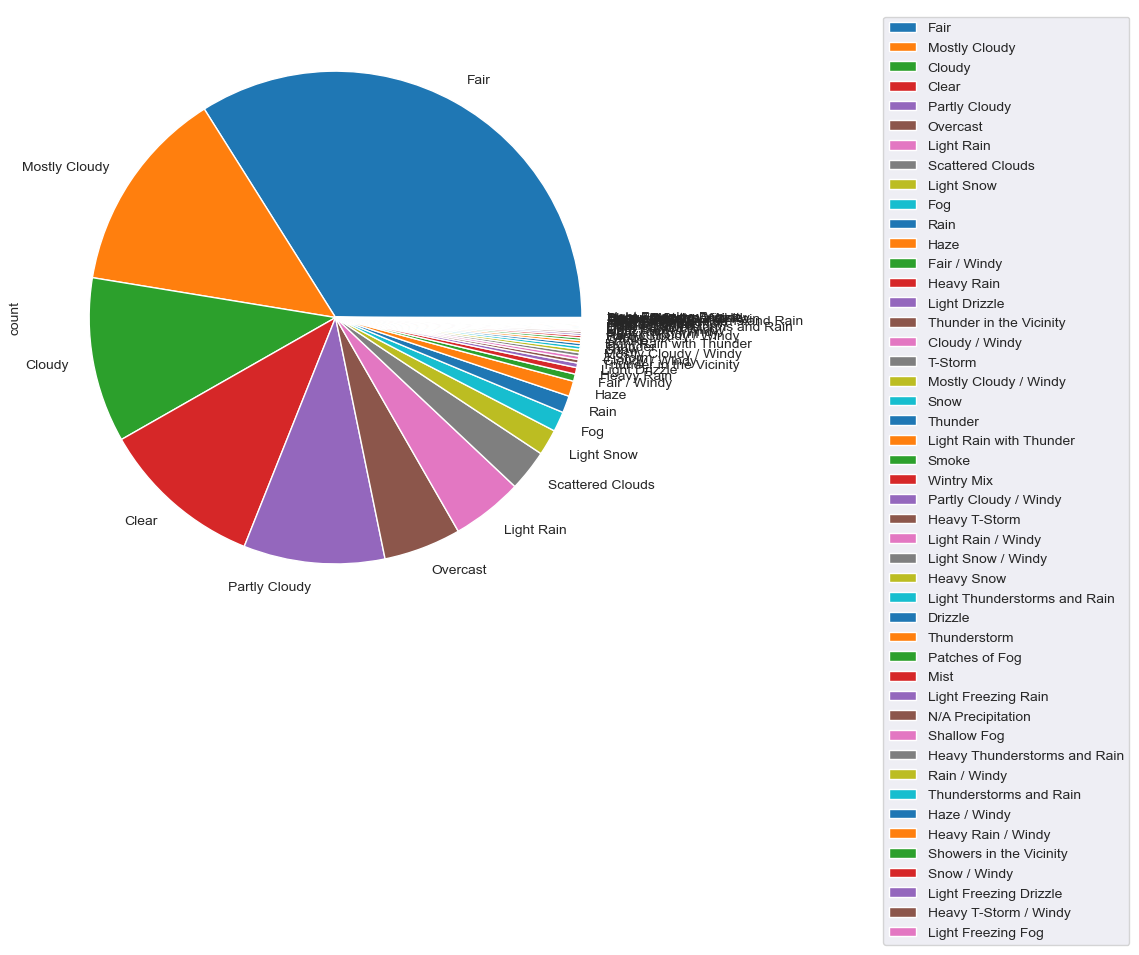

In [160]:
fig, ax = plt.subplots(figsize=(12, 8))
High_accident_weather.plot(kind='pie', autopct=None, ax=ax)
ax.legend(loc='best', bbox_to_anchor=(1.8, 1))
plt.show()
